In [1]:
from datasets import load_from_disk, load_dataset, Dataset, DatasetDict
from src.modules import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the combined dataset from disk
train_dataset_tico_scipar = load_from_disk('data/mixed_dataset_tico_scipar')
train_dataset_wikimedia_scipar = load_from_disk('data/mixed_dataset')
train_dataset_selected_LESS = load_from_disk('data/mixed_dataset_tico_scipar_selected')
# train_dataset_medline_scipar = load_from_disk('data/mixed_dataset_medline_scipar')
train_dataset_corrupted_scipar_tico = load_from_disk('data/corrupted_mixed_scipar_tico')

dev_dataset_tico = load_dataset('sethjsa/tico_en_ru')
dev_dataset_medline= load_dataset('sethjsa/medline_ru_parallel')

dev_dataset_tico_split = 'dev'
dev_dataset_medline_split = 'train'
train_dataset_tico_scipar_split = 'train'
train_dataset_wikimedia_scipar_split = 'train'

model, tokenized_dev_dataset, tokenizer, training_args = 1, 1, 1, 1
dev_sample_percentage = 0.05
save_percentage = 0.05

/home/scur2176/.conda/envs/nlp2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def test_selection_range(model, train_dataset, dev_dataset, tokenized_dev_dataset, train_split, dev_split, dev_sample_percentage, save_percentage, tokenizer, training_args, input_set):
    if input_set == "tico_scipar" or input_set == "medline_scipar":
        selected_data, indices = select_data_subset(model, train_dataset, dev_dataset, tokenized_dev_dataset, dev_sample_percentage, save_percentage, tokenizer, training_args, train_split=train_split, dev_split=dev_split, selection_method="bm25", src_lang="en", output_lang="ru", return_indices=True)
        print(f"testing bm25")
        percentage_bm25 = sum([1 for i in indices if i <2100]) / len(indices) * 100
        indices_bm25 = indices
        print(f"Percentage of indices in selection threshold: {percentage_bm25:.2f}%")
        selected_data, indices = select_data_subset(model, train_dataset, dev_dataset, tokenized_dev_dataset, dev_sample_percentage, save_percentage, tokenizer, training_args, train_split=train_split, dev_split=dev_split, selection_method="5gram", src_lang="en", output_lang="ru", return_indices=True)
        indices_5gram = indices
        print(f"testing 5gram")
        percentage_5gram = sum([1 for i in indices if i <2100]) / len(indices) * 100
        print(f"Percentage of indices in selection threshold: {percentage_5gram:.2f}%")
        selected_data, indices = select_data_subset(model, train_dataset, dev_dataset, tokenized_dev_dataset, dev_sample_percentage, save_percentage, tokenizer, training_args, train_split=train_split, dev_split=dev_split, selection_method="random", src_lang="en", output_lang="ru", return_indices=True)
        indices_random = indices
        print(f"testing random")
        percentage_random = sum([1 for i in indices if i <2100]) / len(indices) * 100
        print(f"Percentage of indices in selection threshold: {percentage_random:.2f}%")
    elif input_set == "wikimedia_scipar":
        selected_data, indices = select_data_subset(model, train_dataset, dev_dataset, tokenized_dev_dataset, dev_sample_percentage, save_percentage, tokenizer, training_args, train_split=train_split, dev_split=dev_split, selection_method="bm25", src_lang="en", output_lang="ru", return_indices=True)
        indices_bm25 = indices
        print(f"testing bm25")
        percentage_bm25 = sum([1 for i in indices if i > 90000]) / len(indices) * 100
        print(f"Percentage of indices in selection threshold: {percentage_bm25:.2f}%")
        selected_data, indices = select_data_subset(model, train_dataset, dev_dataset, tokenized_dev_dataset, dev_sample_percentage, save_percentage, tokenizer, training_args, train_split=train_split, dev_split=dev_split, selection_method="5gram", src_lang="en", output_lang="ru", return_indices=True)
        indices_5gram = indices
        print(f"testing 5gram")
        percentage_5gram = sum([1 for i in indices if i > 90000]) / len(indices) * 100
        print(f"Percentage of indices in selection threshold: {percentage_5gram:.2f}%")
        selected_data, indices = select_data_subset(model, train_dataset, dev_dataset, tokenized_dev_dataset, dev_sample_percentage, save_percentage, tokenizer, training_args, train_split=train_split, dev_split=dev_split, selection_method="random", src_lang="en", output_lang="ru", return_indices=True)
        indices_random = indices
        print(f"testing random")
        percentage_random = sum([1 for i in indices if i > 90000]) / len(indices) * 100
        print(f"Percentage of indices in selection threshold: {percentage_random:.2f}%")
    return percentage_bm25, percentage_5gram, percentage_random, indices_bm25, indices_5gram, indices_random

In [79]:
dev_dataset_tico

DatasetDict({
    test: Dataset({
        features: ['en', 'ru'],
        num_rows: 2100
    })
    dev: Dataset({
        features: ['en', 'ru'],
        num_rows: 971
    })
})

In [100]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# create a plot for varying the dev_sample_percentage threshold
list_bm25 = []
list_5gram = []
list_random = []

for i in np.append(np.arange(0.01, 0.99, 0.10), 1):
    print(f"Testing with dev_sample_percentage: {i}")
    
    percentage_bm25, percentage_5gram, percentage_random, _, _, _ = test_selection_range(model, train_dataset_tico_scipar, dev_dataset_tico, tokenized_dev_dataset, train_dataset_tico_scipar_split, dev_dataset_tico_split, i, save_percentage, tokenizer, training_args, input_set="tico_scipar")
    list_bm25.append(percentage_bm25)
    list_5gram.append(percentage_5gram)
    list_random.append(percentage_random)



Testing with dev_sample_percentage: 0.01
testing bm25
Percentage of indices in selection threshold: 31.07%
testing 5gram
Percentage of indices in selection threshold: 14.38%
testing random
Percentage of indices in selection threshold: 16.03%
Testing with dev_sample_percentage: 0.11
testing bm25
Percentage of indices in selection threshold: 27.27%
testing 5gram
Percentage of indices in selection threshold: 14.38%
testing random
Percentage of indices in selection threshold: 16.86%
Testing with dev_sample_percentage: 0.21000000000000002
testing bm25
Percentage of indices in selection threshold: 23.80%
testing 5gram
Percentage of indices in selection threshold: 14.38%
testing random
Percentage of indices in selection threshold: 16.03%
Testing with dev_sample_percentage: 0.31000000000000005
testing bm25
Percentage of indices in selection threshold: 22.64%
testing 5gram
Percentage of indices in selection threshold: 14.38%
testing random
Percentage of indices in selection threshold: 16.03%
Te

In [107]:
1000 * 0.01

10.0

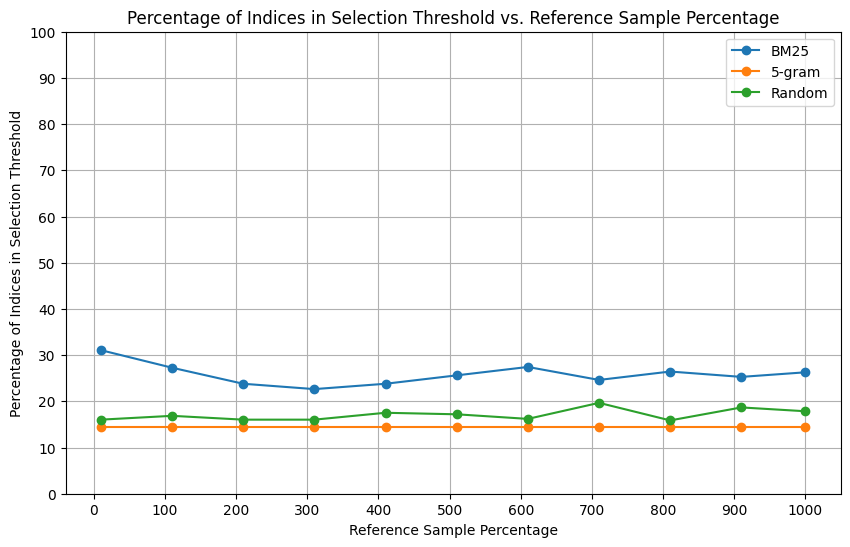

In [ ]:

data = {
    'dev_sample_percentage': np.append(np.arange(10, 990, 100), 1000),
    'bm25': list_bm25,
    '5gram': list_5gram,
    'random': list_random
}
df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(10, 6))
# Plot the data
plt.plot(df['dev_sample_percentage'], df['bm25'], marker='o', label='BM25')
plt.plot(df['dev_sample_percentage'], df['5gram'], marker='o', label='5-gram')
plt.plot(df['dev_sample_percentage'], df['random'], marker='o', label='Random')

# Set the title and labels
plt.title('Percentage of Indices in Selection Threshold vs. Reference Sample Amount')
plt.xlabel('Reference Sample Amount')
plt.ylabel('Percentage of Indices in Selection Threshold')
plt.xticks(np.arange(0, 1001, 100))
plt.yticks(np.arange(0, 110, 10))
plt.grid()
plt.legend()


In [84]:
# create a plot for varying the dev_sample_percentage threshold
list_bm25 = []
list_5gram = []
list_random = []


for i in np.arange(0.001, 0.05, 0.01):
    print(f"Testing with dev_sample_percentage: {i}")
    percentage_bm25, percentage_5gram, percentage_random, _, _, _ = test_selection_range(model, train_dataset_wikimedia_scipar, dev_dataset_medline, tokenized_dev_dataset, train_dataset_wikimedia_scipar_split, dev_dataset_medline_split, i, save_percentage, tokenizer, training_args, input_set="wikimedia_scipar")
    list_bm25.append(percentage_bm25)
    list_5gram.append(percentage_5gram)
    list_random.append(percentage_random)



Testing with dev_sample_percentage: 0.001
testing bm25
Percentage of indices in selection threshold: 25.68%
testing 5gram
Percentage of indices in selection threshold: 23.52%
testing random
Percentage of indices in selection threshold: 9.26%
Testing with dev_sample_percentage: 0.011
testing bm25
Percentage of indices in selection threshold: 27.66%
testing 5gram
Percentage of indices in selection threshold: 23.52%
testing random
Percentage of indices in selection threshold: 9.52%
Testing with dev_sample_percentage: 0.020999999999999998
testing bm25
Percentage of indices in selection threshold: 27.72%
testing 5gram
Percentage of indices in selection threshold: 23.52%
testing random
Percentage of indices in selection threshold: 11.06%
Testing with dev_sample_percentage: 0.030999999999999996
testing bm25
Percentage of indices in selection threshold: 26.34%
testing 5gram
Percentage of indices in selection threshold: 23.52%
testing random
Percentage of indices in selection threshold: 9.90%
T

In [88]:
0.01 * 100000

1000.0

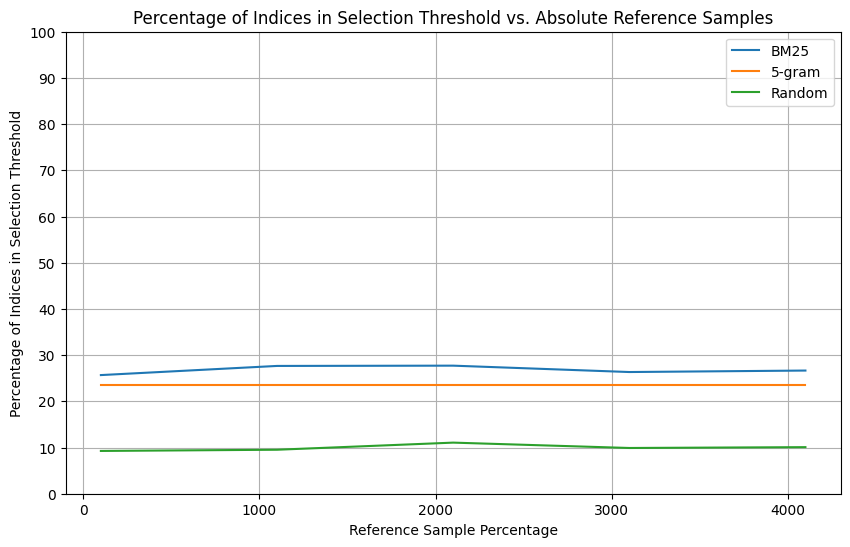

In [96]:
data = {
    'dev_sample_percentage': np.arange(100, 5000, 1000.0),
    'bm25': list_bm25,
    '5gram': list_5gram,
    'random': list_random
}
df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(10, 6))
# Plot the data
plt.plot(df['dev_sample_percentage'], df['bm25'], label='BM25')
plt.plot(df['dev_sample_percentage'], df['5gram'], label='5-gram')
plt.plot(df['dev_sample_percentage'], df['random'], label='Random')

# Set the title and labels
plt.title('Percentage of Indices in Selection Threshold vs. Absolute Reference Samples')
plt.xlabel('Reference Sample Percentage')
plt.ylabel('Percentage of Indices in Selection Threshold')
plt.xticks(np.arange(0, 5000, 1000.0))
plt.yticks(np.arange(0, 110, 10))
plt.grid()
plt.legend()

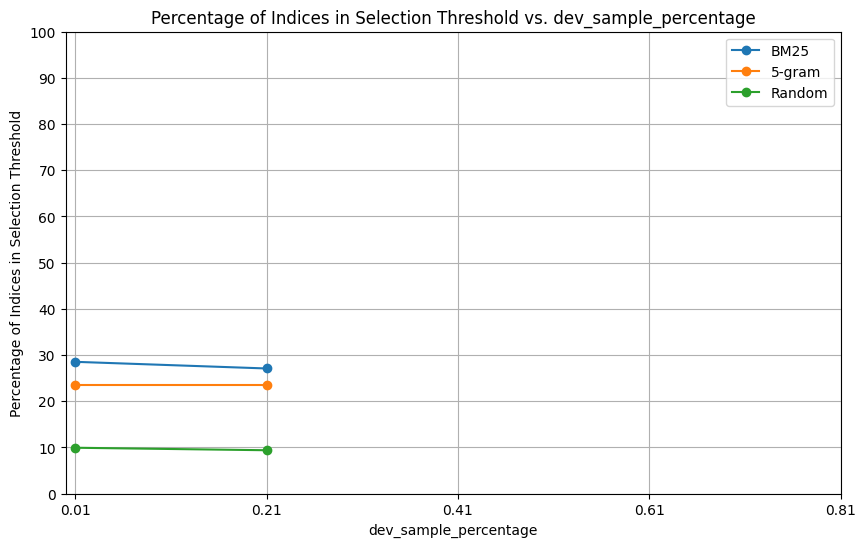

In [31]:
data = {
    'dev_sample_percentage': np.arange(0.01, 0.41, 0.20),
    'bm25': list_bm25,
    '5gram': list_5gram,
    'random': list_random
}
df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(10, 6))
# Plot the data
plt.plot(df['dev_sample_percentage'], df['bm25'], marker='o', label='BM25')
plt.plot(df['dev_sample_percentage'], df['5gram'], marker='o', label='5-gram')
plt.plot(df['dev_sample_percentage'], df['random'], marker='o', label='Random')

# Set the title and labels
plt.title('Percentage of Indices in Selection Threshold vs. dev_sample_percentage')
plt.xlabel('dev_sample_percentage')
plt.ylabel('Percentage of Indices in Selection Threshold')
plt.xticks(np.arange(0.01, 1, 0.20))
plt.yticks(np.arange(0, 110, 10))
plt.grid()
plt.legend()

In [28]:
indices_less = []

with open('grads/mixed_dataset_tico_scipar_full/influence_score/selected_idx.txt') as f:
    for line in f:
        line = line.strip('[]').replace(',', '').split()
        if line != []:
            indices_less.append(int(line[0]))


In [ ]:
# evaluate different save_percentage thresholds
list_bm25 = []
list_5gram = []
list_random = []

percentage_bm25, percentage_5gram, percentage_random, indices_bm25, indices_5gram, indices_random = test_selection_range(model, train_dataset_tico_scipar, dev_dataset_tico, tokenized_dev_dataset, train_dataset_tico_scipar_split, 'test', dev_sample_percentage, 1, tokenizer, training_args, input_set="tico_scipar")


testing bm25
Percentage of indices in selection threshold: 17.36%
testing 5gram
Percentage of indices in selection threshold: 17.36%
testing random
Percentage of indices in selection threshold: 17.36%


In [33]:
# randomly shuffle first 10 indices of 5gram 
indices_5gram[:200] = np.random.permutation(indices_5gram[:200])

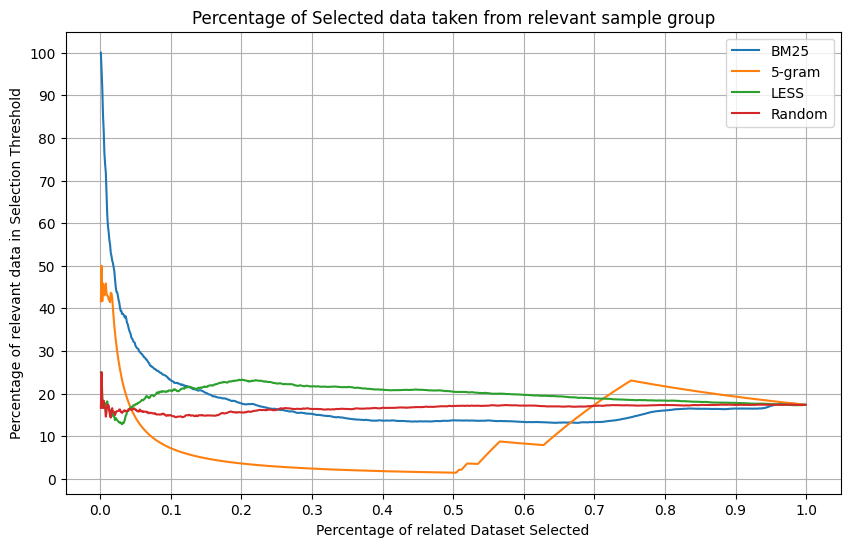

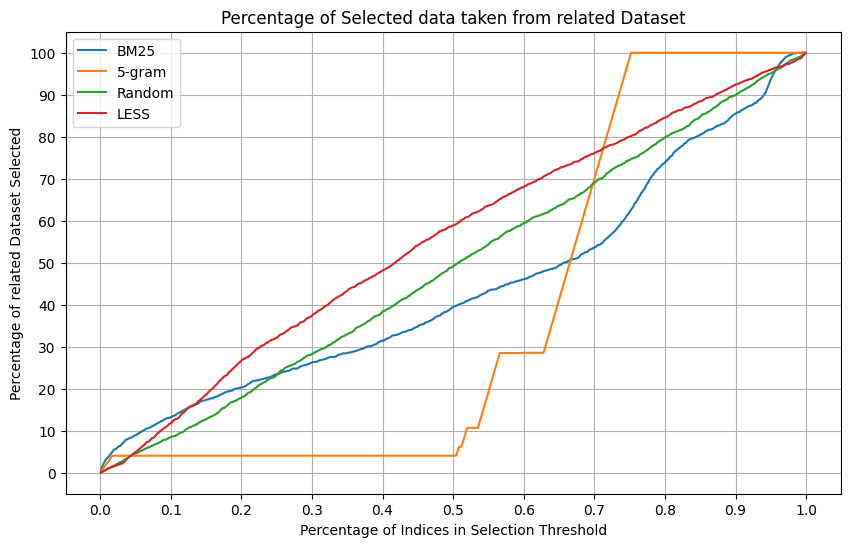

In [35]:
percentage_list_bm25 = []
percentage_list_5gram = []
percentage_list_random = []
percentage_list_less = []
relative_percentage_list_bm25 = []
relative_percentage_list_5gram = []
relative_percentage_list_random = []
relative_percentage_list_less = []

for i in np.arange(0.001, 1, 0.001):
    # select percentage of data
    subindices_bm25 = indices_bm25[:int(len(indices_bm25) * i)]
    subindices_5gram = indices_5gram[:int(len(indices_5gram) * i)]
    subindices_random = indices_random[:int(len(indices_random) * i)]
    subindices_less = indices_less[:int(len(indices_random) * i)]
    # calculate percentage of indices in selection threshold
    percentage_bm25 = sum([1 for i in subindices_bm25 if i < 2100]) / len(subindices_bm25) * 100
    percentage_5gram = sum([1 for i in subindices_5gram if i < 2100]) / len(subindices_5gram) * 100
    percentage_random = sum([1 for i in subindices_random if i < 2100]) / len(subindices_random) * 100
    percentage_less= sum([1 for i in subindices_less if i < 2100]) / len(subindices_less) * 100
    percentage_list_bm25.append(percentage_bm25)
    percentage_list_5gram.append(percentage_5gram)
    percentage_list_random.append(percentage_random)
    percentage_list_less.append(percentage_less)
    relative_percentage_bm25 = sum([1 for i in subindices_bm25 if i < 2100]) / 2100 * 100
    relative_percentage_5gram = sum([1 for i in subindices_5gram if i < 2100]) / 2100 * 100
    relative_percentage_random = sum([1 for i in subindices_random if i < 2100]) / 2100 * 100
    relative_percentage_less = sum([1 for i in subindices_less if i < 2100]) / 2100 * 100
    relative_percentage_list_bm25.append(relative_percentage_bm25)
    relative_percentage_list_5gram.append(relative_percentage_5gram)
    relative_percentage_list_random.append(relative_percentage_random)
    relative_percentage_list_less.append(relative_percentage_less)


data = {
    'save_percentage': np.arange(0.001, 1, 0.001),
    'bm25': percentage_list_bm25,
    '5gram': percentage_list_5gram,
    'random': percentage_list_random,
    'less' : percentage_list_less
}
df = pd.DataFrame(data)
# Set the figure size
plt.figure(figsize=(10, 6))
# Plot the data
plt.plot(df['save_percentage'], df['bm25'], label='BM25')
plt.plot(df['save_percentage'], df['5gram'], label='5-gram')
plt.plot(df['save_percentage'], df['less'], label='LESS')
plt.plot(df['save_percentage'], df['random'], label='Random')

# Set the title and labels
plt.title('Percentage of Selected data taken from relevant sample group')
plt.xlabel('Percentage of related Dataset Selected')
plt.ylabel('Percentage of relevant data in Selection Threshold')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 110, 10))
plt.grid()
plt.legend()
plt.show()


# evaluate different save_percentage thresholds
data = {
    'save_percentage': np.arange(0.001, 1, 0.001),
    'bm25': relative_percentage_list_bm25,
    '5gram': relative_percentage_list_5gram,
    'random': relative_percentage_list_random,
    'less' : relative_percentage_list_less,

}
df = pd.DataFrame(data)
# Set the figure size
plt.figure(figsize=(10, 6))
# Plot the data
plt.plot(df['save_percentage'], df['bm25'], label='BM25')
plt.plot(df['save_percentage'], df['5gram'], label='5-gram')
plt.plot(df['save_percentage'], df['random'], label='Random')
plt.plot(df['save_percentage'], df['less'], label='LESS')


# Set the title and labels
plt.title('Percentage of Selected data taken from related Dataset')
plt.ylabel('Percentage of related Dataset Selected')
plt.xlabel('Percentage of Indices in Selection Threshold')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 110, 10))
plt.grid()
plt.legend()
plt.show()

In [36]:
# evaluate different save_percentage thresholds on wikimedia_scipar
list_bm25 = []
list_5gram = []
list_random = []

percentage_bm25, percentage_5gram, percentage_random, indices_bm25, indices_5gram, indices_random = test_selection_range(model, train_dataset_wikimedia_scipar, dev_dataset_medline, tokenized_dev_dataset, train_dataset_wikimedia_scipar_split, dev_dataset_medline_split, dev_sample_percentage, 1, tokenizer, training_args, input_set="wikimedia_scipar")

: 

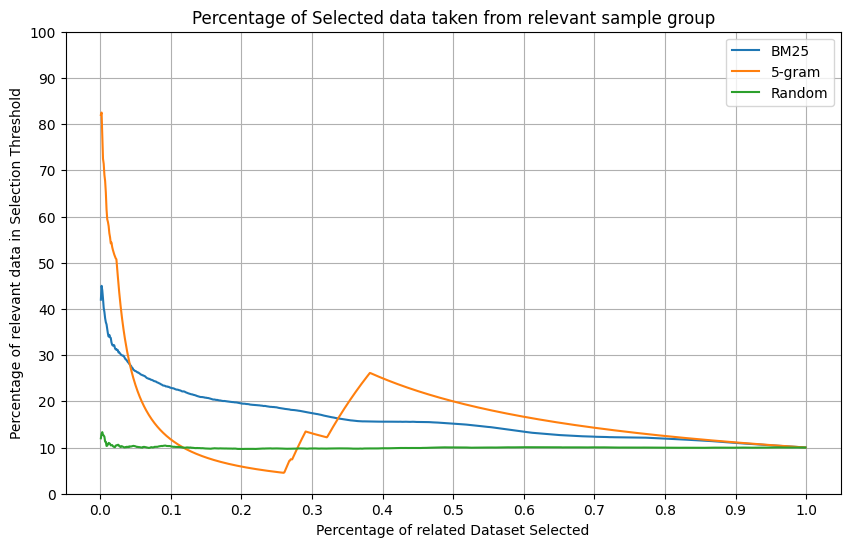

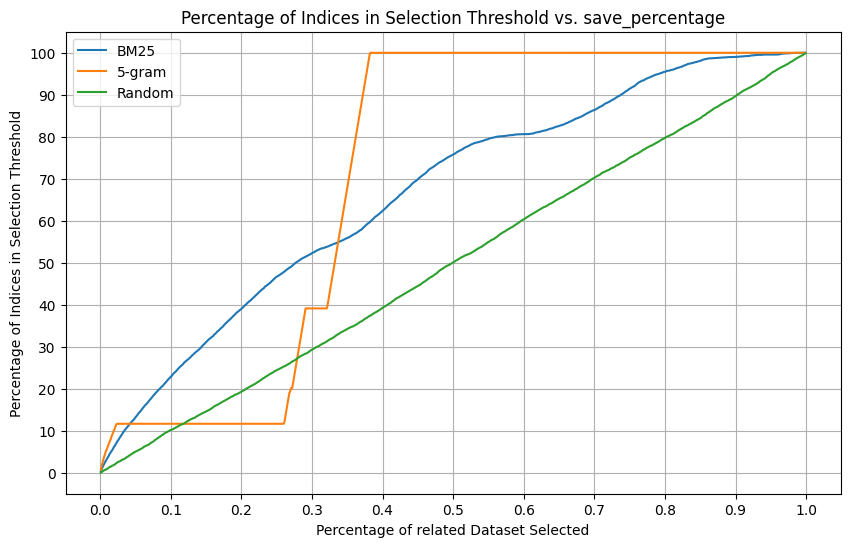

In [ ]:
percentage_list_bm25 = []
percentage_list_5gram = []
percentage_list_random = []
relative_percentage_list_bm25 = []
relative_percentage_list_5gram = []
relative_percentage_list_random = []

for i in np.arange(0.001, 1, 0.001):
    # select percentage of data
    subindices_bm25 = indices_bm25[:int(len(indices_bm25) * i)]
    subindices_5gram = indices_5gram[:int(len(indices_5gram) * i)]
    subindices_random = indices_random[:int(len(indices_random) * i)]
    # calculate percentage of indices in selection threshold
    percentage_bm25 = sum([1 for i in subindices_bm25 if i > 90000]) / len(subindices_bm25) * 100
    percentage_5gram = sum([1 for i in subindices_5gram if i > 90000]) / len(subindices_5gram) * 100
    percentage_random = sum([1 for i in subindices_random if i > 90000]) / len(subindices_random) * 100
    percentage_list_bm25.append(percentage_bm25)
    percentage_list_5gram.append(percentage_5gram)
    percentage_list_random.append(percentage_random)
    relative_percentage_bm25 = sum([1 for i in subindices_bm25 if i > 90000]) / 10000 * 100
    relative_percentage_5gram = sum([1 for i in subindices_5gram if i > 90000]) / 10000 * 100
    relative_percentage_random = sum([1 for i in subindices_random if i > 90000]) / 10000 * 100
    relative_percentage_list_bm25.append(relative_percentage_bm25)
    relative_percentage_list_5gram.append(relative_percentage_5gram)
    relative_percentage_list_random.append(relative_percentage_random)

data = {
    'save_percentage': np.arange(0.001, 1, 0.001),
    'bm25': percentage_list_bm25,
    '5gram': percentage_list_5gram,
    'random': percentage_list_random
}
df = pd.DataFrame(data)
# Set the figure size
plt.figure(figsize=(10, 6))
# Plot the data
plt.plot(df['save_percentage'], df['bm25'], label='BM25')
plt.plot(df['save_percentage'], df['5gram'], label='5-gram')
plt.plot(df['save_percentage'], df['random'], label='Random')
# Set the title and labels
plt.title('Percentage of Selected data taken from relevant sample group')
plt.xlabel('Percentage of related Dataset Selected')
plt.ylabel('Percentage of relevant data in Selection Threshold')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 110, 10))
plt.grid()
plt.legend()
plt.show()


# evaluate different save_percentage thresholds
data = {
    'save_percentage': np.arange(0.001, 1, 0.001),
    'bm25': relative_percentage_list_bm25,
    '5gram': relative_percentage_list_5gram,
    'random': relative_percentage_list_random
}
df = pd.DataFrame(data)
# Set the figure size
plt.figure(figsize=(10, 6))
# Plot the data
plt.plot(df['save_percentage'], df['bm25'], label='BM25')
plt.plot(df['save_percentage'], df['5gram'], label='5-gram')
plt.plot(df['save_percentage'], df['random'], label='Random')
# Set the title and labels
plt.title('Percentage of Indices in Selection Threshold vs. save_percentage')
plt.ylabel('Percentage of related Dataset Selected')
plt.xlabel('Percentage of Indices in Selection Threshold')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 110, 10))
plt.grid()
plt.legend()
plt.show()

In [3]:
indices_less = []

with open('grads/mixed_dataset_selected_corrupted_scipar_tico/influence_score/selected_idx.txt') as f:
    for line in f:
        line = line.strip('[]').replace(',', '').split()
        if line != []:
            indices_less.append(int(line[0]))

In [ ]:
# evaluate different save_percentage thresholds
list_bm25 = []
list_5gram = []
list_random = []

percentage_bm25, percentage_5gram, percentage_random, indices_bm25, indices_5gram, indices_random = test_selection_range(model, train_dataset, dev_dataset_tico, tokenized_dev_dataset, train_dataset_tico_scipar_split, dev_dataset_tico_split, dev_sample_percentage, 1, tokenizer, training_args, input_set="medline_scipar")

testing bm25
Percentage of indices in selection threshold: 17.36%
testing 5gram
Percentage of indices in selection threshold: 17.36%
testing random
Percentage of indices in selection threshold: 17.36%


In [15]:
np.random.shuffle(indices_5gram[:2000])

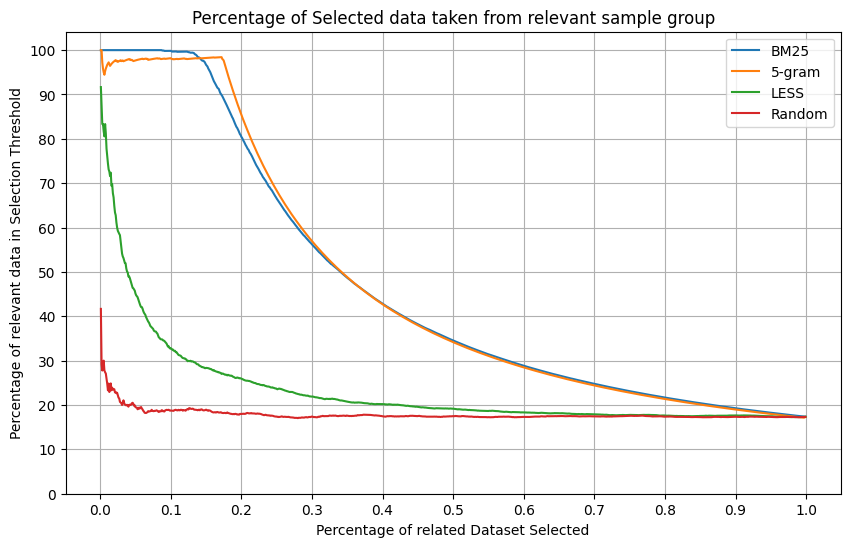

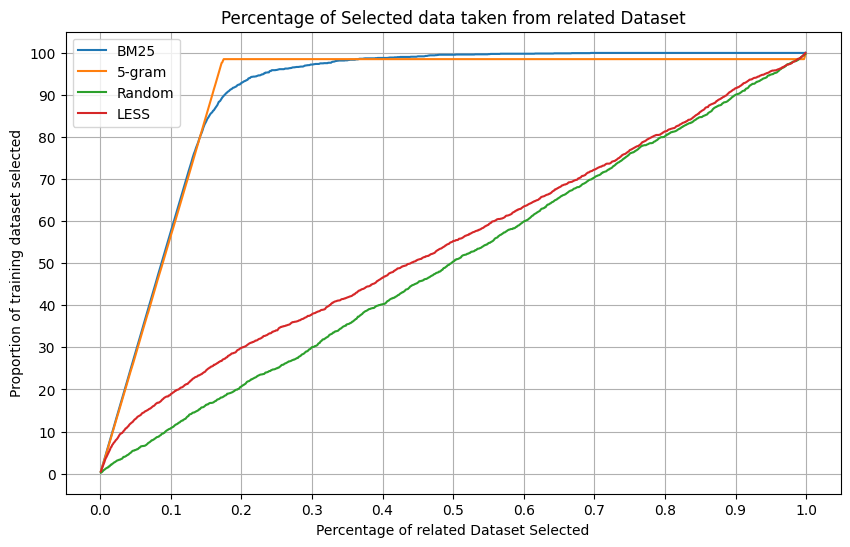

In [ ]:
percentage_list_bm25 = []
percentage_list_5gram = []
percentage_list_random = []
percentage_list_less = []
relative_percentage_list_bm25 = []
relative_percentage_list_5gram = []
relative_percentage_list_random = []
relative_percentage_list_less = []

for i in np.arange(0.001, 1, 0.001):
    # select percentage of data
    subindices_bm25 = indices_bm25[:int(len(indices_bm25) * i)]
    subindices_5gram = indices_5gram[:int(len(indices_5gram) * i)]
    subindices_random = indices_random[:int(len(indices_random) * i)]
    subindices_less = indices_less[:int(len(indices_random) * i)]
    # calculate percentage of indices in selection threshold
    percentage_bm25 = sum([1 for i in subindices_bm25 if i < 2100]) / len(subindices_bm25) * 100samples_distribution_corrupted_tico_absolute.png
    percentage_5gram = sum([1 for i in subindices_5gram if i < 2100]) / len(subindices_5gram) * 100
    percentage_random = sum([1 for i in subindices_random if i < 2100]) / len(subindices_random) * 100
    percentage_less= sum([1 for i in subindices_less if i < 2100]) / len(subindices_less) * 100
    percentage_list_bm25.append(percentage_bm25)
    percentage_list_5gram.append(percentage_5gram)
    percentage_list_random.append(percentage_random)
    percentage_list_less.append(percentage_less)
    relative_percentage_bm25 = sum([1 for i in subindices_bm25 if i < 2100]) / 2100 * 100
    relative_percentage_5gram = sum([1 for i in subindices_5gram if i < 2100]) / 2100 * 100
    relative_percentage_random = sum([1 for i in subindices_random if i < 2100]) / 2100 * 100
    relative_percentage_less = sum([1 for i in subindices_less if i < 2100]) / 2100 * 100
    relative_percentage_list_bm25.append(relative_percentage_bm25)
    relative_percentage_list_5gram.append(relative_percentage_5gram)
    relative_percentage_list_random.append(relative_percentage_random)
    relative_percentage_list_less.append(relative_percentage_less)


data = {
    'save_percentage': np.arange(0.001, 1, 0.001),
    'bm25': percentage_list_bm25,
    '5gram': percentage_list_5gram,
    'random': percentage_list_random,
    'less' : percentage_list_less
}
df = pd.DataFrame(data)
# Set the figure size
plt.figure(figsize=(10, 6))
# Plot the data
plt.plot(df['save_percentage'], df['bm25'], label='BM25')
plt.plot(df['save_percentage'], df['5gram'], label='5-gram')
plt.plot(df['save_percentage'], df['less'], label='LESS')
plt.plot(df['save_percentage'], df['random'], label='Random')

# Set the title and labels
plt.title('Percentage of Selected data taken from relevant sample group')
plt.xlabel('Percentage of related Dataset Selected')
plt.ylabel('Percentage of relevant data in Selection Threshold')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 110, 10))
plt.grid()
plt.legend()
plt.show()


# evaluate different save_percentage thresholds
data = {
    'save_percentage': np.arange(0.001, 1, 0.001),
    'bm25': relative_percentage_list_bm25,
    '5gram': relative_percentage_list_5gram,
    'random': relative_percentage_list_random,
    'less' : relative_percentage_list_less,

}
df = pd.DataFrame(data)
# Set the figure size
plt.figure(figsize=(10, 6))
# Plot the data
plt.plot(df['save_percentage'], df['bm25'], label='BM25')
plt.plot(df['save_percentage'], df['5gram'], label='5-gram')
plt.plot(df['save_percentage'], df['random'], label='Random')
plt.plot(df['save_percentage'], df['less'], label='LESS')


# Set the title and labels
plt.title('Percentage of Selected data taken from related Dataset')
plt.xlabel('Percentage of related Dataset Selected')
plt.ylabel('Proportion of training dataset selected')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 110, 10))
plt.grid()
plt.legend()
plt.show()